<a href="https://colab.research.google.com/github/Kiruthika2712/PRODIGY_ML_01/blob/main/ml_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file =('/content/train.csv')
data = pd.read_csv(file)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Handle missing data with mean imputation
data_subset.loc[:, :] = data_subset.fillna(data_subset.mean())


# Select only the required columns
selected_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
data_subset = data[selected_columns]

# Print the first few rows of the dataset
data_subset.head(30)


<ipython-input-59-1e29be61d95e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.loc[:, :] = data_subset.fillna(data_subset.mean())


,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000
5,1362,1,1,143000
6,1694,3,2,307000
7,2090,3,2,200000
8,1774,2,2,129900
9,1077,2,1,118000


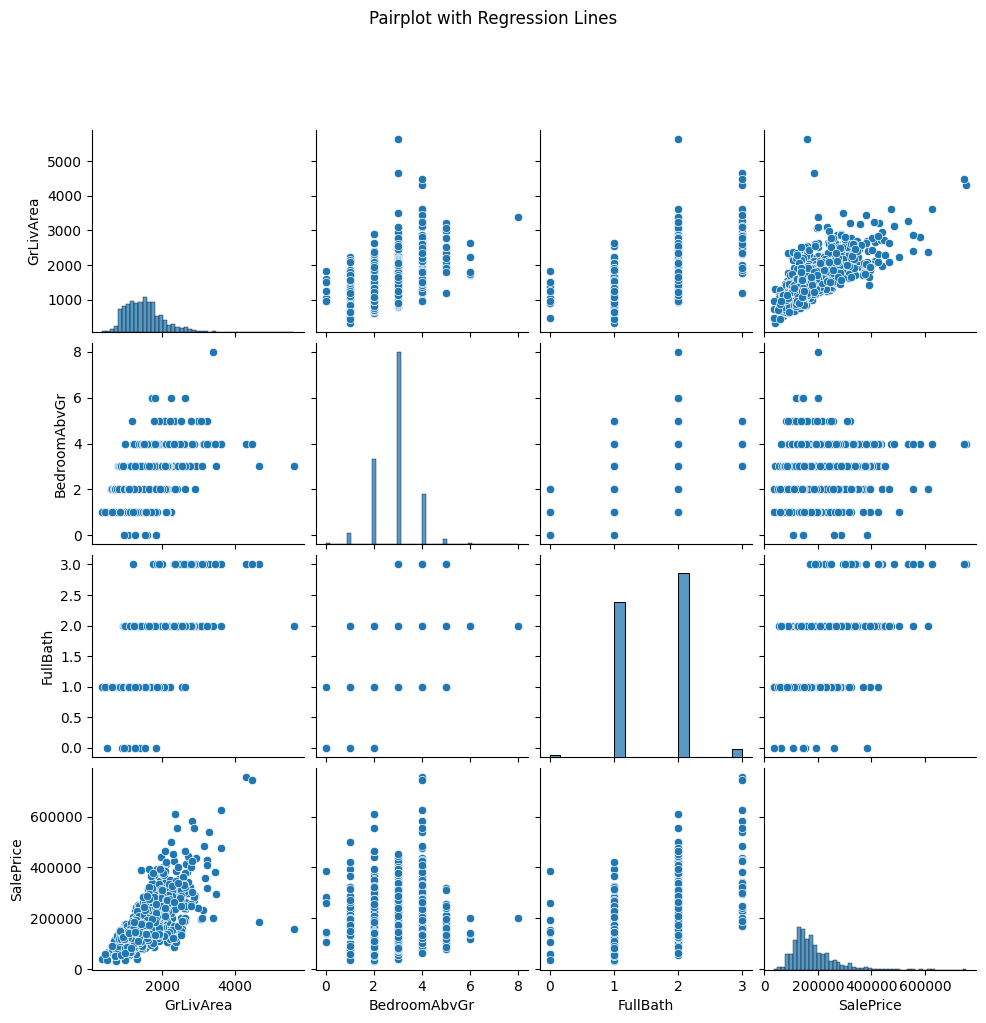

In [ ]:
# Explore data distribution
pairplot = sns.pairplot(data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']])
pairplot.fig.suptitle('Pairplot with Regression Lines', y=1.02)
pairplot.fig.subplots_adjust(top=0.9)
plt.show()


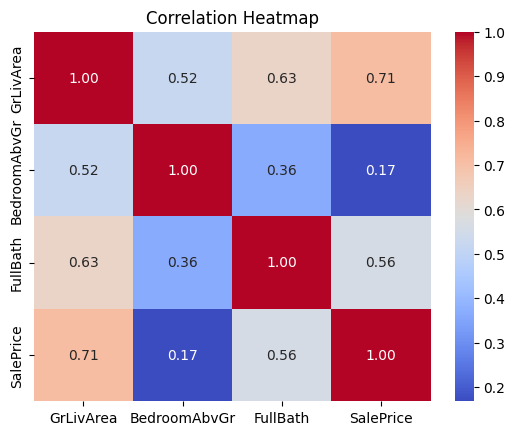

In [ ]:
# Residual plot
residuals = y_test - predictions
residual_plot = plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# Split the dataset into training and testing sets
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)


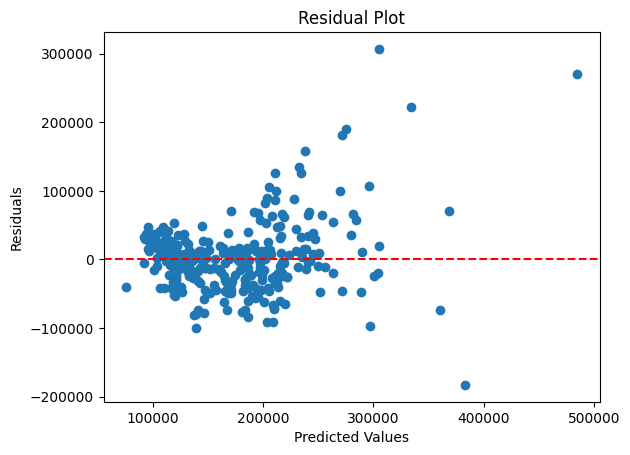

In [ ]:
# Residual plot
residuals = y_test - predictions
residual_plot = plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


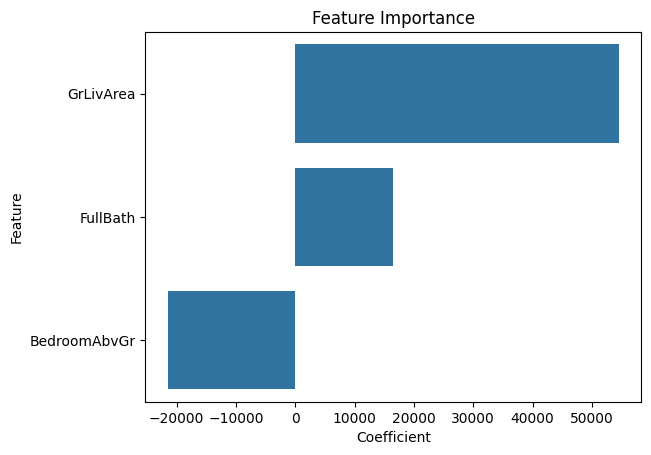

In [ ]:
# Feature importance
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
feature_importance_plot = sns.barplot(x='Coefficient', y='Feature', data=coefficients)
feature_importance_plot.set_title('Feature Importance')
plt.show()
